In [1]:
import ssl

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

In [4]:
new_columns = {
    'Количество родившихся чел.': 'birth_count',
    'Год': 'year'
}

In [5]:
df_birth = pd \
            .read_html(url, header=0)[0] \
            .rename(columns=new_columns) \
            .replace({'birth_count': {' ': ''}}, regex=True) \
            .astype({'birth_count': int})

In [6]:
presidents = [(1959, 1991, '#FF0000', 'СССР'),
              (1991, 2000, '#FF00FF', 'Ельцин'),
              (2000, 2008, '#006FC4', 'Путин'),
              (2008, 2012, '#009861', 'Медведев'),
              (2012, 2021, '#006FC4', 'Путин')
              ]

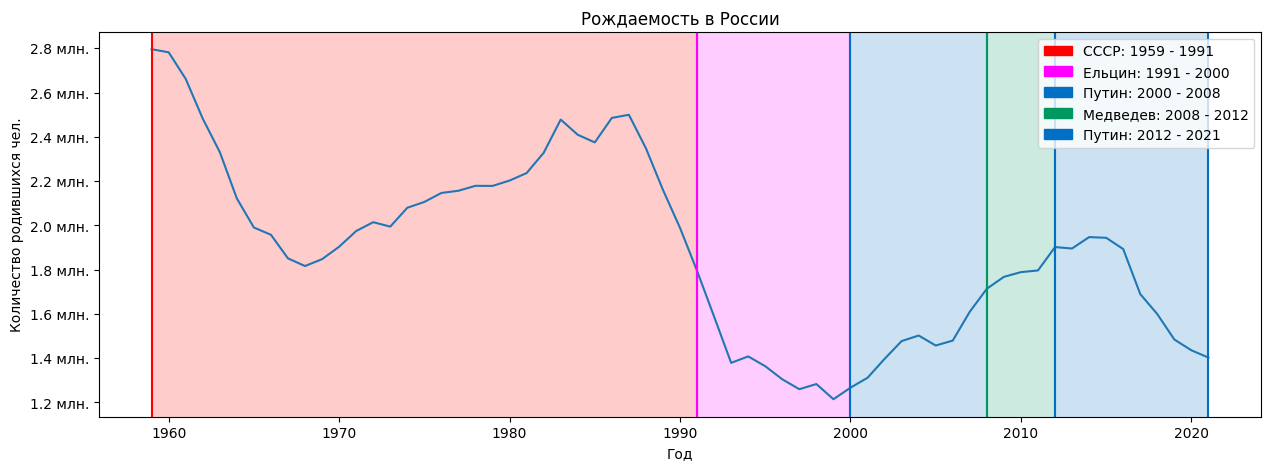

In [7]:
plt.subplots(figsize=(15, 5))

plt.plot(df_birth.year, df_birth.birth_count)
plt.ticklabel_format(style='plain')
plt.title('Рождаемость в России')
plt.xlabel('Год')
plt.ylabel('Количество родившихся чел.')

# Функция для форматирования меток оси y
def millions_formatter(x, pos):
    return '{:.1f} млн.'.format(x/1000000)

# Форматируем метки оси y
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Создаем список патчей для легенды
patches = []
for president in presidents:
    plt.axvline(x=president[0], color=president[2])
    plt.axvline(x=president[1], color=president[2])
    plt.axvspan(president[0], president[1], facecolor=president[2], alpha=0.2)

    patch = mpatches.Patch(color=president[2], label='{}: {} - {}'.format(president[3], president[0], president[1]))
    patches.append(patch)

# Отображаем легенду в правом верхнем углу графика
plt.legend(handles=patches, loc='upper right')

plt.show()